In [90]:
import pandas as pd  #preprocessing
import numpy as np   #for numerical data
import seaborn as sns  #visualization
import plotly.express as  px #visualization
import matplotlib.pyplot as plt #for plotting
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv("water_potability.csv")
df.head() # the first 5 columns
#df. tail() # the last 5 columns


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [92]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

**Preprocessing Starts**

In [93]:
df.describe() # the descriptive statistics of DataFrames

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [94]:
df.info() # the information about the data whether they are float, int,etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


There are some null values in the dataset let see the total number of null values in each column

In [95]:
df.isnull().sum() # the sum of all null values in each column

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Plotting the dataset with the null values only 

<Axes: >

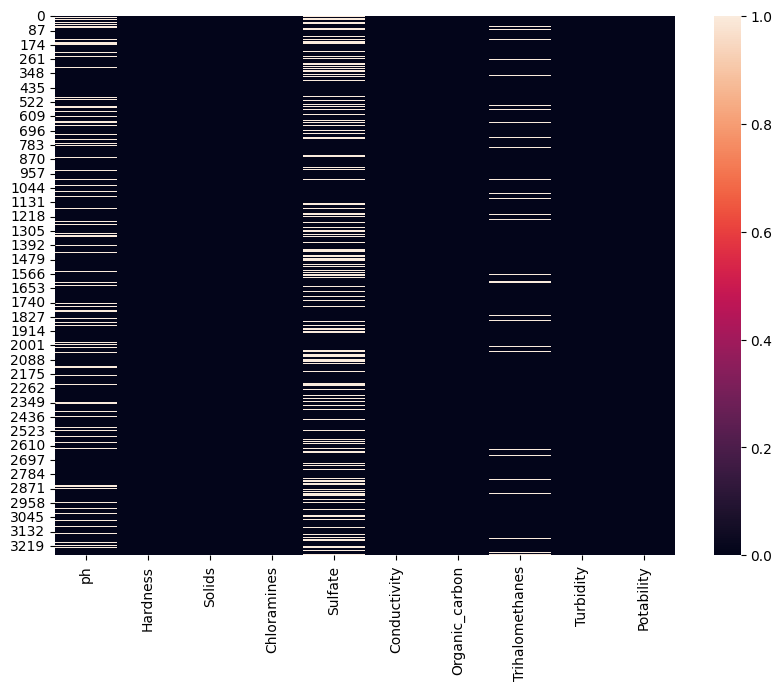

In [96]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull())

<Axes: >

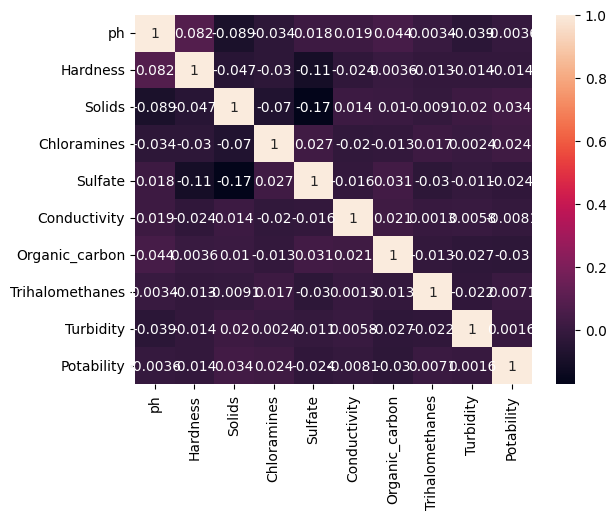

In [97]:
plt.Figure(figsize = (20,20))
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='Potability', ylabel='count'>

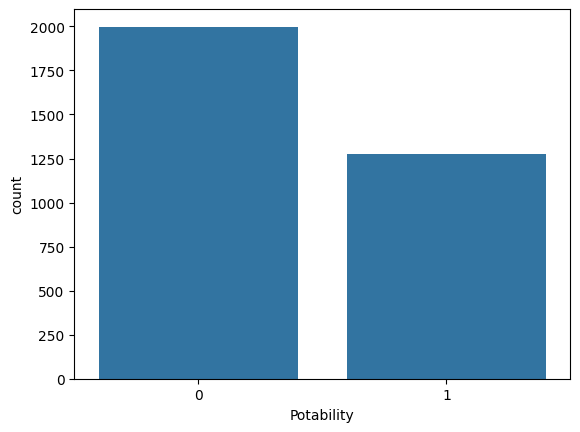

In [98]:
sns.countplot(x="Potability", data=df)

In [99]:
df["Potability"].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

Visualization of the data set and checking for outliers

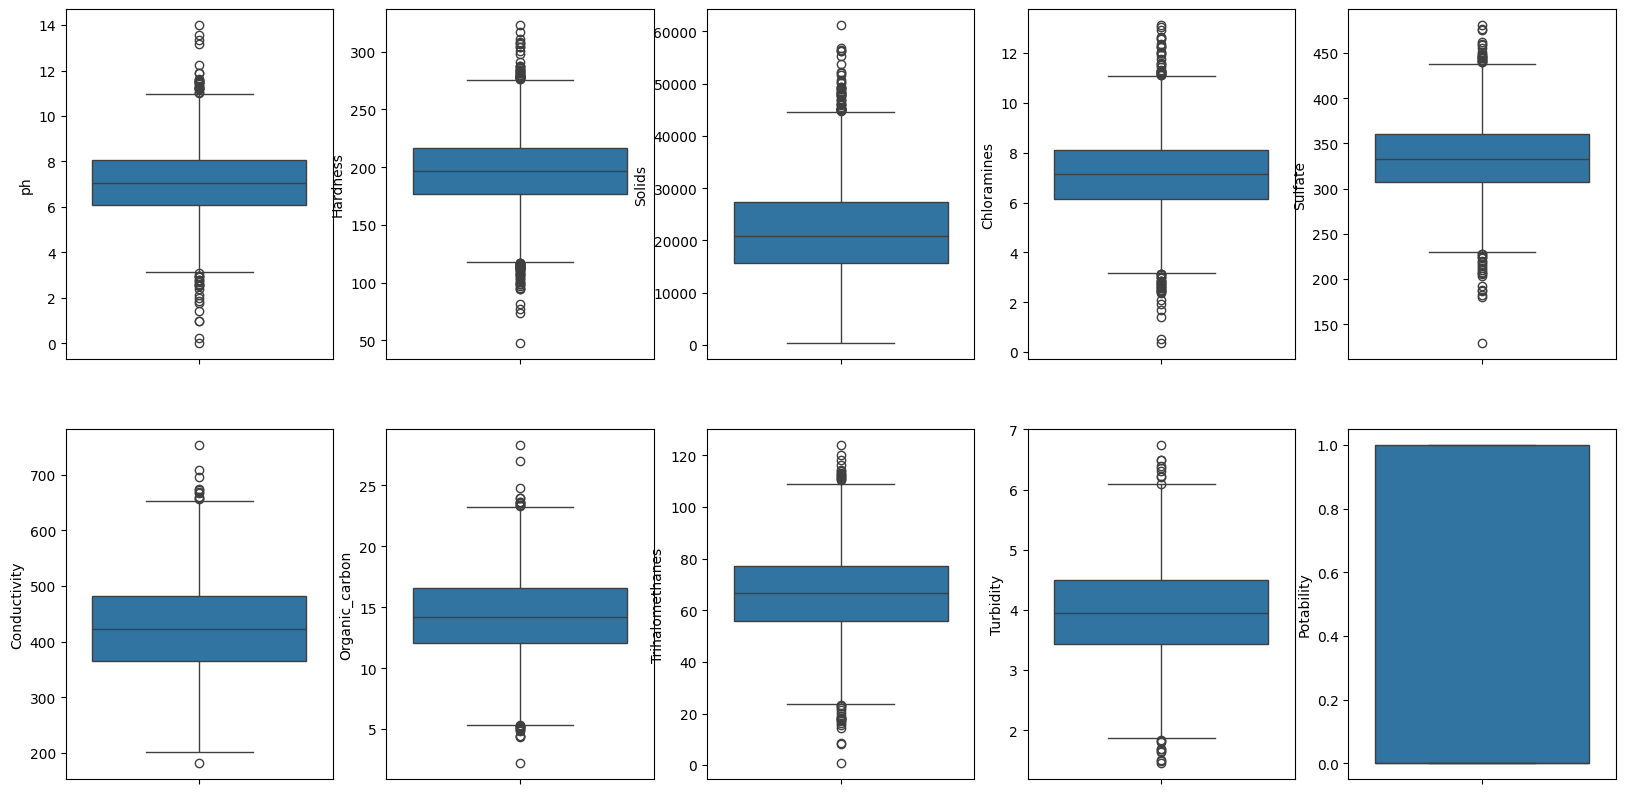

In [100]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
ax = ax.flatten()
index = 0
for col, values in df.items():
    sns.boxplot(y = col, data = df, ax=ax[index])
    index += 1

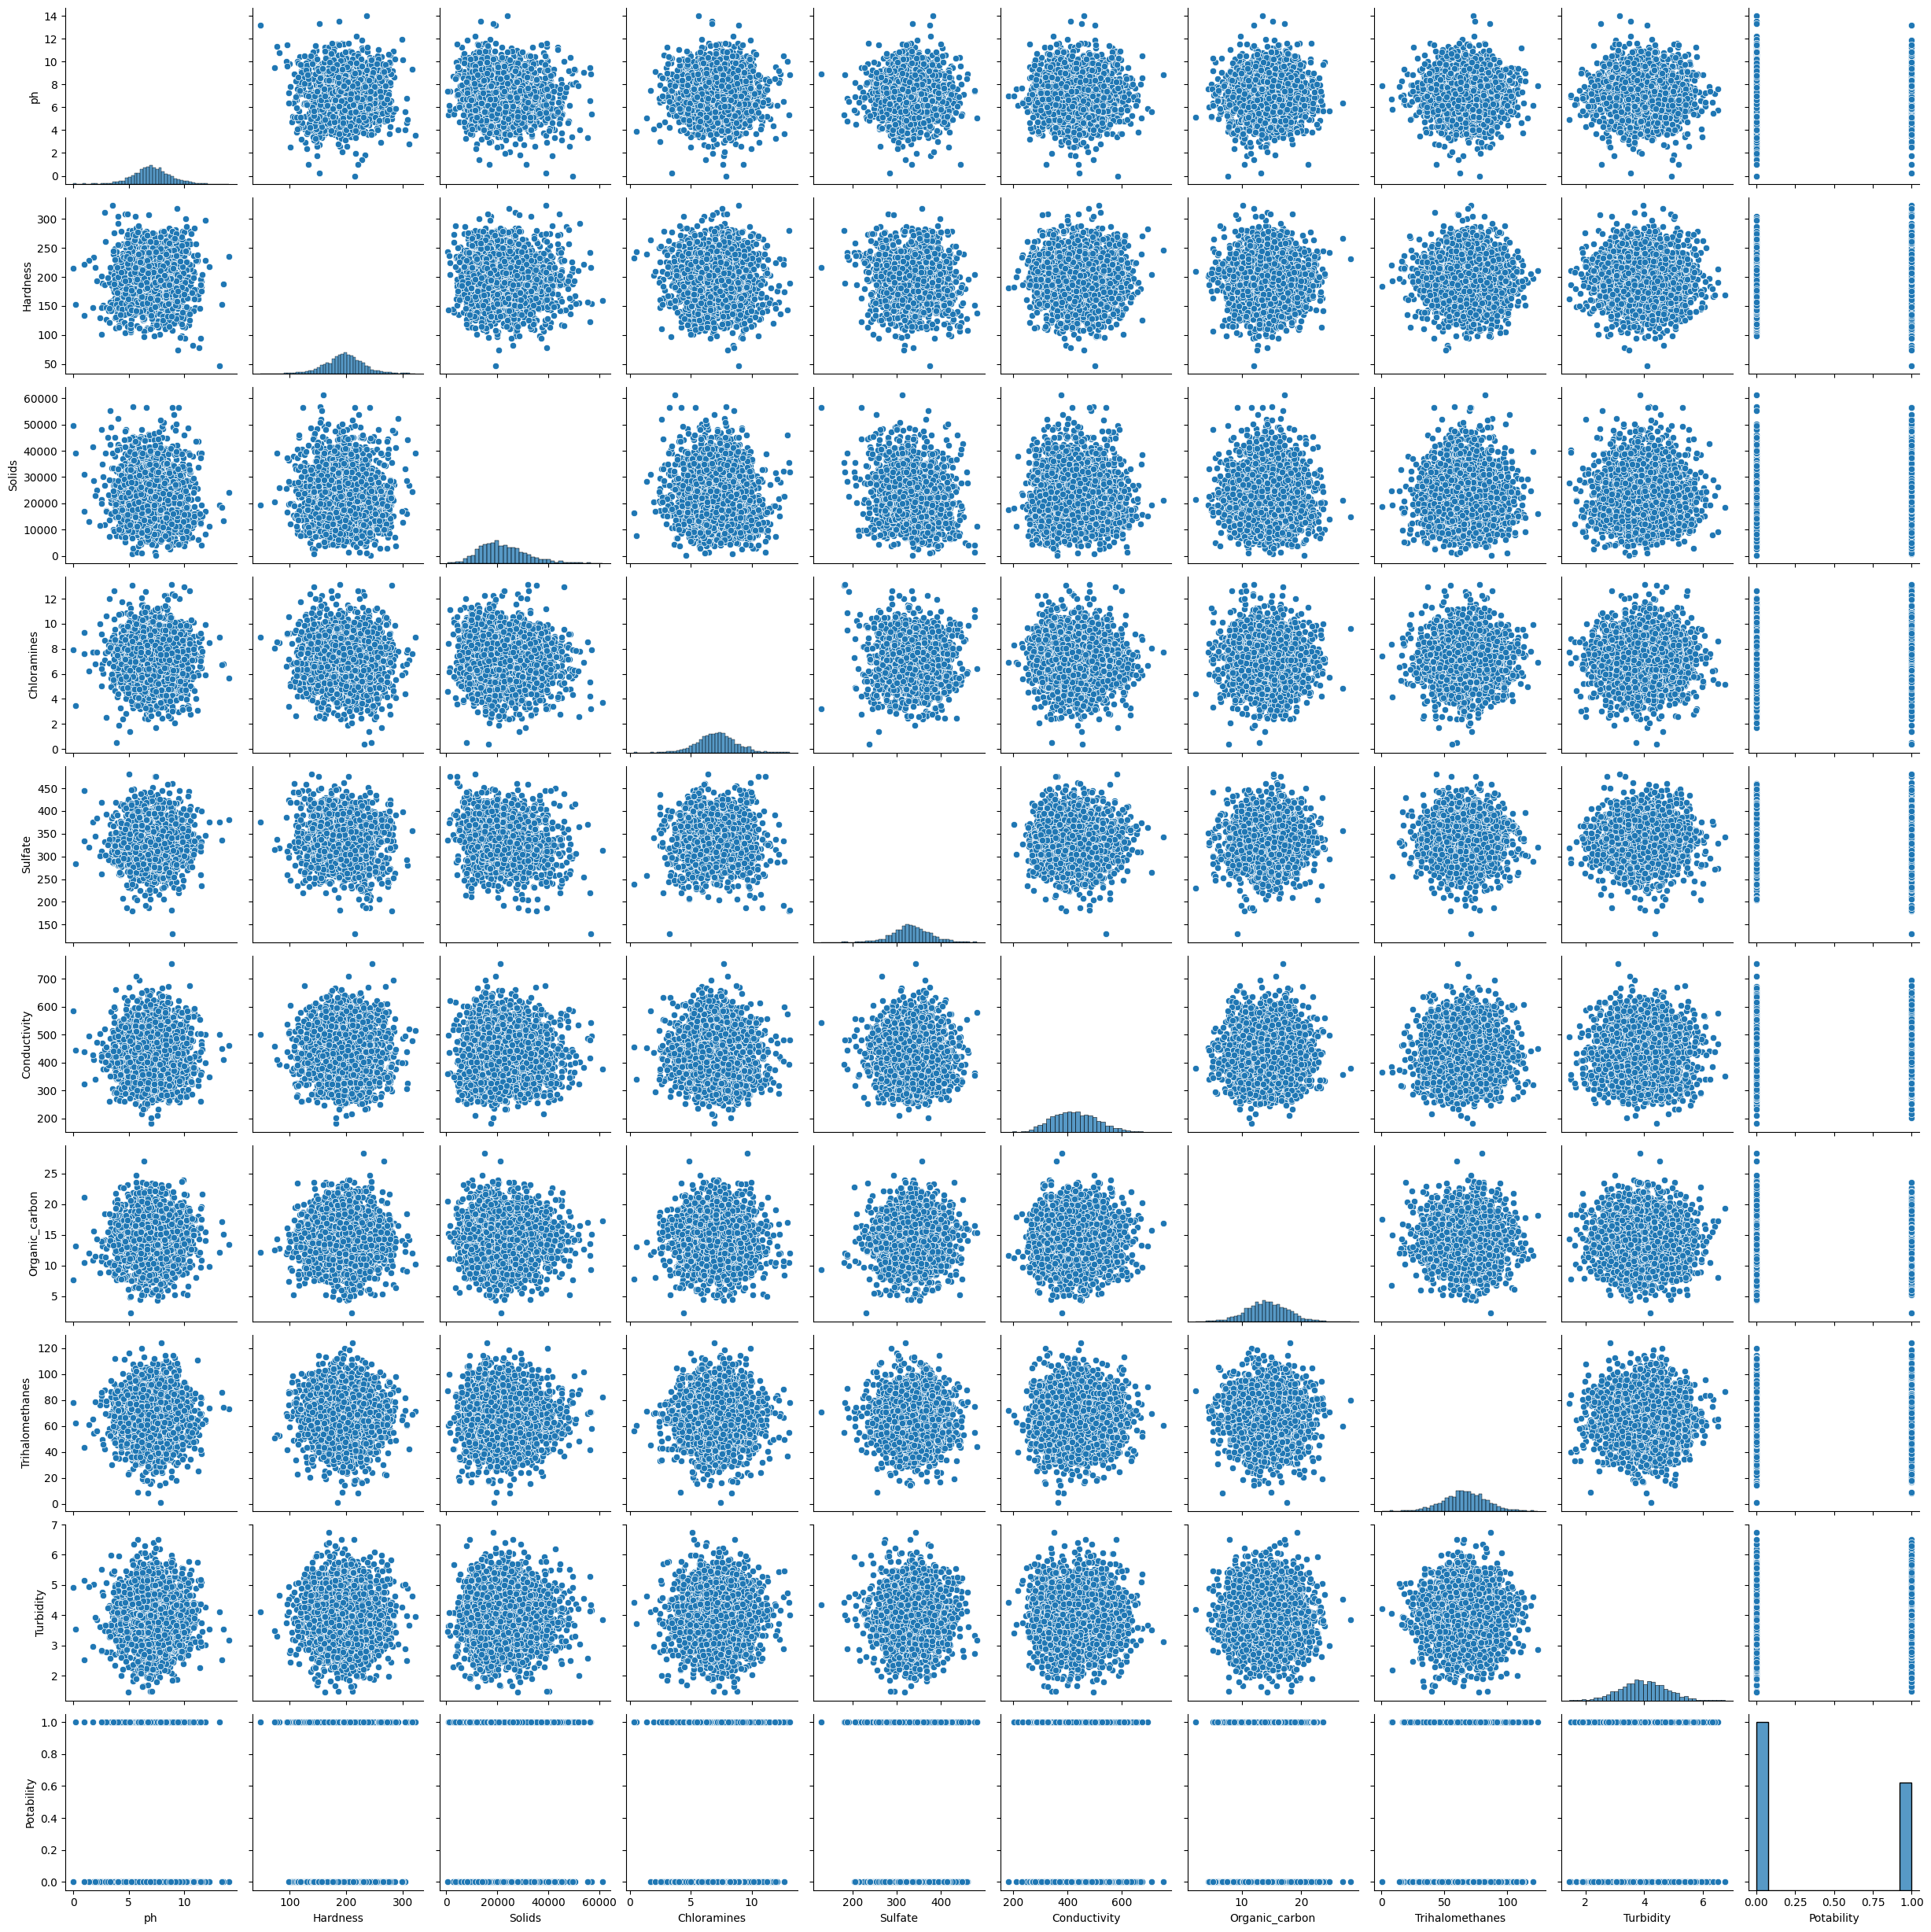

In [101]:
sns.pairplot(df)

In [102]:
fig = px.pie(df, names = "Potability", hole = 0.4, template= "plotly_dark")
fig.show()

In [103]:
fig = px.scatter(df,x="ph",y="Sulfate",color="Potability",template="plotly_dark")
fig.show()

In [104]:
fig = px.scatter(df,x="Organic_carbon",y="Hardness",color="Potability",template="plotly_dark")
fig.show()

In [105]:
fig = px.scatter(df,x="Trihalomethanes",y="Chloramines",color="Potability",template="plotly_dark")
fig.show()

Dealing with Null Values

Text(0, 0.5, 'Percentage of Missing Values')

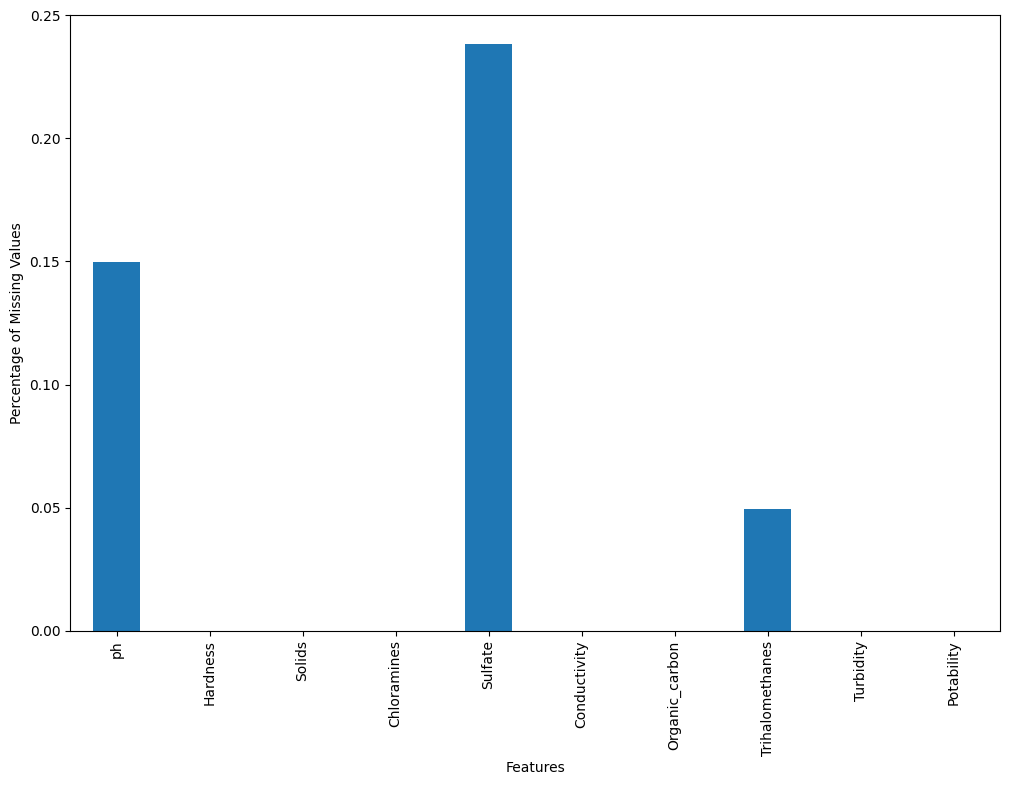

In [106]:
df.isnull().mean().plot.bar(figsize=(12,8))
plt.xlabel("Features")
plt.ylabel("Percentage of Missing Values")

In [107]:
df["ph"]  = df["ph"].fillna(df["ph"].mean())

df["Sulfate"]  = df["Sulfate"].fillna(df["Sulfate"].mean())

df["Trihalomethanes"]  = df["Trihalomethanes"].fillna(df["Trihalomethanes"].mean())

Check for null values if they exist or not

In [108]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

The next step will show the null values in visualized form 

<Axes: >

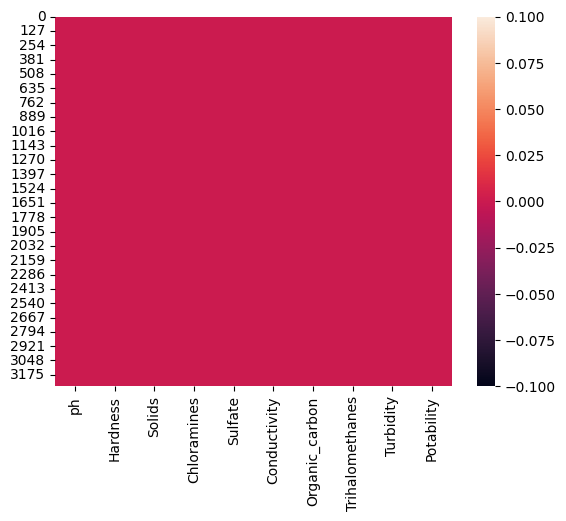

In [109]:
sns.heatmap(df.isnull())

**Data Preparation**

In [110]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [111]:
x = df.drop("Potability", axis=1)
y = df["Potability"]

In [112]:
x.shape, y.shape

((3276, 9), (3276,))

In [113]:
scaler = StandardScaler()
x= scaler.fit_transform(x)
x

array([[-6.04313345e-16,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]],
      shape=(3276, 9))

Splitting Data (keeping 80% data for training and 20% data for testing)

In [114]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [115]:
x_train.shape, x_test.shape
#return a tuple indicating the size of each dimension.
#in x-axis, we have (rows=2620, columns=9) in x_train and (rows=656, columns=9) in x_test.

((2620, 9), (656, 9))

In [116]:
y_train.shape, y_test.shape
#in y axis we have only potability(column=1 and corresponding rows from x-axis)

((2620,), (656,))

**KNN**

In [117]:
from sklearn.neighbors import  KNeighborsClassifier

#Creating object of Model
# model_knn = KNeighborsClassifier()
# n_neighbors = number of closest neighbors used to classify a new point.

In [118]:
for i in range(4,17):
    model_knn = KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(x_train, y_train)
    prediction_knn = model_knn.predict(x_test)
    accuracy_score_knn = accuracy_score(y_test, prediction_knn)
    print(i, accuracy_score_knn)

4 0.635670731707317
5 0.614329268292683
6 0.6310975609756098
7 0.6295731707317073
8 0.6387195121951219
9 0.6234756097560976
10 0.635670731707317
11 0.6158536585365854
12 0.6310975609756098
13 0.6234756097560976
14 0.6463414634146342
15 0.6371951219512195
16 0.6448170731707317


If n_neighbors is set to 3, the algorithm finds the 3 closest points and classifies the new point based on the majority of those 3 points.

If n_neighbors is too low, the model may overfit, meaning it memorizes data instead of learning it.

If n_neighbors is too high, the model may underfit, meaning it doesn't learn data efficiently.

In [119]:
model_knn = KNeighborsClassifier(n_neighbors=10)
model_knn.fit(x_train, y_train)
prediction_knn = model_knn.predict(x_test)
accuracy_score_knn = accuracy_score(y_test, prediction_knn)
accuracy_score_knn*100

63.5670731707317

The Accuracy Score of KNN is **63.567** 

**SVM**

In [ ]:
from sklearn.svm import SVC

#Creating object of Model
model_svm = SVC(kernel= "rbf")
#a kernel is a mathematical function that transforms data into a higher-dimensional space.
#radial basis function (RBF) kernel is a popular kernel function used in support vector machines (SVMs) for classification

Model Training

In [121]:
model_svm.fit(x_train, y_train)

SVC()

Make Prediction

In [122]:
prediction_svm = model_svm.predict(x_test)

In [123]:
accuracy_score_svm = accuracy_score(y_test, prediction_svm)
accuracy_score_svm*100

66.61585365853658

The Accuracy Score of the SVM Model is **67.225**

**XGBoost**

In [ ]:
from xgboost import XGBClassifier

#Creating object of Model
model_xgb = XGBClassifier(n_estimators=100, learning_rate=0.04)
#It's an implementation of the gradient boosting algorithm, known for its efficiency and performance.
#XGBClassifier can handle binary and multiclass classification problems. It offers various parameters for customization, including tree depth, learning rate, and regularization, allowing fine-tuning for optimal results.

**The defaults for XGBClassifier are:**
* max_depth=3
* learning_rate=0.1
* n_estimators=100
* silent=True
* objective='binary:logistic'
* booster='gbtree'
* n_jobs=1
* nthread=None

Training model

In [125]:
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.04, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Prediction

In [126]:
prediction_xgb = model_xgb.predict(x_test)

In [127]:
accuracy_score_xgb = accuracy_score(y_test, prediction_xgb)
accuracy_score_xgb*100

65.09146341463415

The Accuracy of the XGBoost is **65.091**

**RF**

In [128]:
from sklearn.ensemble import RandomForestClassifier

#Creating object of Model
model_rf = RandomForestClassifier()
#n_estimators refers to the number of decision trees that are included in the forest

Training model

In [129]:
model_rf.fit(x_train, y_train)

RandomForestClassifier()

Predictions

In [130]:
prediction_rf = model_rf.predict(x_test)

In [131]:
accuracy_score_rf = accuracy_score(y_test, prediction_rf)
accuracy_score_rf*100

67.53048780487805

The Accuracy of the RF is **67.073**

In [132]:
cm3= confusion_matrix(y_test, prediction_rf)
cm3

array([[355,  49],
       [164,  88]])

In [136]:
models = pd.DataFrame({
    "Model": ["KNN", "SVM", "XGBoost", "Random Forest"],
    "Accuracy": [accuracy_score_knn, accuracy_score_svm, accuracy_score_xgb, accuracy_score_rf]
})
models

,Model,Accuracy
0,KNN,0.635671
1,SVM,0.666159
2,XGBoost,0.650915
3,Random Forest,0.675305


,Model,Accuracy
0,KNN,0.635671
2,XGBoost,0.650915
1,SVM,0.666159
3,Random Forest,0.675305


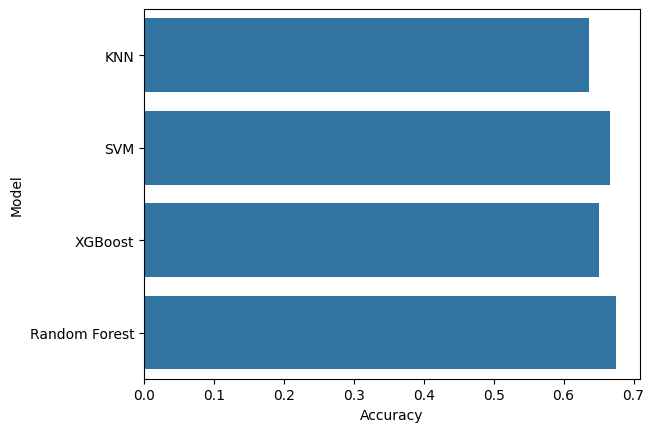

In [137]:
sns.barplot(x= "Accuracy", y="Model", data =models)
models.sort_values(by="Accuracy", ascending= True)